In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
from scipy.misc import imsave
from scipy.misc import imread

df = pd.read_csv("Track.csv")
df.head()

,Frame,cL,yL,xL,AmpL,cR,yR,xR,AmpR,Time
0,911,185.0,199.0,296.0,383.0,186.0,198.0,99.0,527.0,0.00911
1,912,185.0,199.0,296.0,387.0,186.0,198.0,99.0,516.0,0.00912
2,913,185.0,199.0,296.0,393.0,186.0,198.0,99.0,509.0,0.00913
3,914,185.0,199.0,296.0,385.0,186.0,198.0,99.0,508.0,0.00914
4,915,185.0,199.0,296.0,374.0,186.0,198.0,99.0,513.0,0.00915


In [2]:
A = []
one = [1,1,1,1,1,1,1,1,1]
zero = [0,0,0,0,0,0,0,0,0]
for ip in range(len(df)):
    plx = df['xL'].iloc[ip]
    ply = df['cL'].iloc[ip]
    prx = df['xR'].iloc[ip]
    pry = df['cR'].iloc[ip]
    xlxr = plx*prx
    xlyr = plx*pry
    xl = plx
    ylxr = ply*prx
    ylyr = ply*pry
    yl = ply
    xr = prx
    yr = pry
    null = 1
    Ai = [xlxr,xlyr,xl,ylxr,ylyr,yl,xr,yr,1]
    A.append(Ai) 
Aarray = np.matrix(A)
AarrayT = Aarray.transpose()
AA = Aarray.transpose()*Aarray
AA

matrix([[  1.95166322e+12,   5.26868139e+12,   2.29587302e+10,
           1.32247398e+12,   3.61199176e+12,   1.56529803e+10,
           5.92039564e+09,   1.58537005e+10,   6.93649340e+07],
        [  5.26868139e+12,   1.48535845e+13,   6.34214289e+10,
           3.61199176e+12,   1.03041996e+13,   4.37605467e+10,
           1.58537005e+10,   4.43603488e+10,   1.90096465e+08],
        [  2.29587302e+10,   6.34214289e+10,   2.73403589e+08,
           1.56529803e+10,   4.37605467e+10,   1.87603835e+08,
           6.93649340e+07,   1.90096465e+08,   8.22695000e+05],
        [  1.32247398e+12,   3.61199176e+12,   1.56529803e+10,
           8.98911064e+11,   2.48429490e+12,   1.07066324e+10,
           4.00322074e+09,   1.08464695e+10,   4.71917190e+07],
        [  3.61199176e+12,   1.03041996e+13,   4.37605467e+10,
           2.48429490e+12,   7.17133954e+12,   3.02943162e+10,
           1.08464695e+10,   3.07164258e+10,   1.30905791e+08],
        [  1.56529803e+10,   4.37605467e+10,   1.8

In [3]:
w, v = LA.eig(AA)
v1 = v.transpose()
print(w)
print(v1)
imin = np.argmin(w)
print(imin)
en = w[imin]
ev = v1[imin]
ev

[  2.47504336e+13   1.25205362e+11   4.09223633e+08   3.36623319e+06
   6.39471818e+03   3.25205144e+02   6.29159237e+01   1.28822206e+00
   2.43793240e-05]
[[ -2.75082950e-01  -7.74669079e-01  -3.30943616e-03  -1.88529392e-01
   -5.37263114e-01  -2.28285300e-03  -8.27967998e-04  -2.31408587e-03
   -9.92210277e-06]
 [  7.93045696e-01  -5.55451458e-02   4.28800046e-03   3.91477459e-01
   -4.63368099e-01   1.10249263e-03   2.84539346e-03   9.82939160e-04
    1.81530596e-05]
 [  3.01945710e-01  -6.28233519e-01   7.31426463e-03   1.32894875e-01
    7.04492591e-01   7.11806936e-03   5.71602345e-03   6.61300467e-03
    6.88432263e-05]
 [  4.51677814e-01   4.58432564e-02   1.09772702e-02  -8.90775421e-01
    1.51071300e-02   2.02911988e-03   2.83613292e-03   6.61877861e-03
    5.26703427e-05]
 [ -1.47254485e-02   4.28119714e-03   7.12245989e-01   6.67812153e-03
   -9.67953106e-03   4.52149458e-01   2.87597149e-01   4.52942846e-01
    4.87026992e-03]
 [ -9.43064822e-04   1.38263185e-03  -3.949

matrix([[  2.77791933e-05,   9.69070625e-06,  -4.75653016e-03,
          -1.26248376e-05,  -6.44460165e-06,   2.57572179e-03,
          -6.47767092e-03,  -1.72986878e-03,   9.99962893e-01]])

In [4]:
AA*ev.transpose()

matrix([[ -5.96046448e-08],
        [ -1.78813934e-07],
        [ -1.17812306e-07],
        [ -5.96046448e-08],
        [ -1.19209290e-07],
        [  6.21657819e-08],
        [ -1.58324838e-07],
        [ -4.23751771e-08],
        [  2.43784179e-05]])

In [5]:
ev1 = np.array(ev)
ev1 = ev1[0]
F = [[ev1[0],ev1[3],ev1[6]],[ev1[1],ev1[4],ev1[7]],[ev1[2],ev1[5],ev1[8]]]
MatrixL = np.array(F)
MatrixR = MatrixL.transpose()
MatrixL

array([[  2.77791933e-05,  -1.26248376e-05,  -6.47767092e-03],
       [  9.69070625e-06,  -6.44460165e-06,  -1.72986878e-03],
       [ -4.75653016e-03,   2.57572179e-03,   9.99962893e-01]])

(0, 0.3488743857943278, 0.1413721071451381)
(1, 0.3488743857943278, 0.1413721071451381)
(2, 0.3488743857943278, 0.1413721071451381)
(3, 0.3488743857943278, 0.1413721071451381)
(4, 0.3488743857943278, 0.1413721071451381)
(5, 0.49965127259074477, 0.21269045359445485)
(6, 0.49965127259074477, 0.21269045359445485)
(7, 0.49965127259074477, 0.21269045359445485)
(8, 0.029502964907324635, 0.01227365341165723)
(9, 0.029502964907324635, 0.01227365341165723)
(10, 0.029502964907324635, 0.01227365341165723)
(11, 0.029502964907324635, 0.01227365341165723)
(12, 0.029502964907324635, 0.01227365341165723)
(13, 0.029502964907324635, 0.01227365341165723)
(14, 0.029502964907324635, 0.01227365341165723)
(15, 0.029502964907324635, 0.01227365341165723)
(16, 0.029502964907324635, 0.01227365341165723)
(17, 0.1894925388168612, 0.07501574966723532)
(18, 0.1894925388168612, 0.07501574966723532)
(19, 0.1894925388168612, 0.07501574966723532)
(20, 0.1894925388168612, 0.07501574966723532)
(21, 0.1894925388168612, 0.0

(179, 0.024221202301469204, 0.01140076348351441)
(180, 0.024221202301469204, 0.01140076348351441)
(181, 0.024221202301469204, 0.01140076348351441)
(182, 0.024221202301469204, 0.01140076348351441)
(183, 0.024221202301469204, 0.01140076348351441)
(184, 0.024221202301469204, 0.01140076348351441)
(185, 0.024221202301469204, 0.01140076348351441)
(186, 0.8503933897665886, 0.4274125864124272)
(187, 0.8503933897665886, 0.4274125864124272)
(188, 0.8503933897665886, 0.4274125864124272)
(189, 0.8503933897665886, 0.4274125864124272)
(190, 0.8503933897665886, 0.4274125864124272)
(191, 0.8503933897665886, 0.4274125864124272)
(192, 0.8503933897665886, 0.4274125864124272)
(193, 0.8503933897665886, 0.4274125864124272)
(194, 0.8503933897665886, 0.4274125864124272)
(195, 0.4623238853234284, 0.21283237104154398)
(196, 0.4623238853234284, 0.21283237104154398)
(197, 0.4623238853234284, 0.21283237104154398)
(198, 0.4623238853234284, 0.21283237104154398)
(199, 0.4623238853234284, 0.21283237104154398)
(200, 0.

(358, 0.15018957513779368, 0.09165596937451295)
(359, 0.15018957513779368, 0.09165596937451295)
(360, 0.15018957513779368, 0.09165596937451295)
(361, 0.15018957513779368, 0.09165596937451295)
(362, 0.15018957513779368, 0.09165596937451295)
(363, 0.15018957513779368, 0.09165596937451295)
(364, 0.07839072752891847, 0.04490972369504913)
(365, 0.07839072752891847, 0.04490972369504913)
(366, 0.07839072752891847, 0.04490972369504913)
(367, 0.07839072752891847, 0.04490972369504913)
(368, 0.07839072752891847, 0.04490972369504913)
(369, 0.07839072752891847, 0.04490972369504913)
(370, 0.07839072752891847, 0.04490972369504913)
(371, 0.07839072752891847, 0.04490972369504913)
(372, 0.9848051422947652, 0.6185632301272949)
(373, 0.9848051422947652, 0.6185632301272949)
(374, 0.5624156198103311, 0.3386489205945543)
(375, 0.5624156198103311, 0.3386489205945543)
(376, 0.5624156198103311, 0.3386489205945543)
(377, 0.5624156198103311, 0.3386489205945543)
(378, 0.5624156198103311, 0.3386489205945543)
(379, 

(548, 0.3260631737615589, 0.25045137408733786)
(549, 0.3260631737615589, 0.25045137408733786)
(550, 0.3260631737615589, 0.25045137408733786)
(551, 0.3260631737615589, 0.25045137408733786)
(552, 0.3260631737615589, 0.25045137408733786)
(553, 0.3260631737615589, 0.25045137408733786)
(554, 0.3260631737615589, 0.25045137408733786)
(555, 0.3260631737615589, 0.25045137408733786)
(556, 0.3260631737615589, 0.25045137408733786)
(557, 0.3260631737615589, 0.25045137408733786)
(558, 0.3260631737615589, 0.25045137408733786)
(559, 0.3260631737615589, 0.25045137408733786)
(560, 0.3260631737615589, 0.25045137408733786)
(561, 0.3260631737615589, 0.25045137408733786)
(562, 0.3260631737615589, 0.25045137408733786)
(563, 0.6117194291400875, 0.5350328010636889)
(564, 0.6117194291400875, 0.5350328010636889)
(565, 0.6117194291400875, 0.5350328010636889)
(566, 0.6117194291400875, 0.5350328010636889)
(567, 0.6117194291400875, 0.5350328010636889)
(568, 0.26449646086900913, 0.2183042039650215)
(569, 0.2644964608

(722, 0.46689036558293323, 0.4534448225795383)
(723, 0.46689036558293323, 0.4534448225795383)
(724, 0.46689036558293323, 0.4534448225795383)
(725, 0.46689036558293323, 0.4534448225795383)
(726, 0.46689036558293323, 0.4534448225795383)
(727, 0.46689036558293323, 0.4534448225795383)
(728, 0.46689036558293323, 0.4534448225795383)
(729, 0.46689036558293323, 0.4534448225795383)
(730, 0.46689036558293323, 0.4534448225795383)
(731, 0.46689036558293323, 0.4534448225795383)
(732, 0.46689036558293323, 0.4534448225795383)
(733, 0.46689036558293323, 0.4534448225795383)
(734, 0.46689036558293323, 0.4534448225795383)
(735, 0.46689036558293323, 0.4534448225795383)
(736, 0.46689036558293323, 0.4534448225795383)
(737, 0.46689036558293323, 0.4534448225795383)
(738, 0.46689036558293323, 0.4534448225795383)
(739, 0.46689036558293323, 0.4534448225795383)
(740, 0.46689036558293323, 0.4534448225795383)
(741, 0.46689036558293323, 0.4534448225795383)
(742, 0.46689036558293323, 0.4534448225795383)
(743, 0.46689

(896, 0.46453711863870095, 0.6591841360994245)
(897, 0.46453711863870095, 0.6591841360994245)
(898, 0.46453711863870095, 0.6591841360994245)
(899, 0.46453711863870095, 0.6591841360994245)
(900, 0.46453711863870095, 0.6591841360994245)
(901, 0.46453711863870095, 0.6591841360994245)
(902, 1.0523393070458977, 1.3684746341081906)
(903, 1.0523393070458977, 1.3684746341081906)
(904, 0.06103072715096606, 0.08744650066110453)
(905, 0.06103072715096606, 0.08744650066110453)
(906, 0.06103072715096606, 0.08744650066110453)
(907, 0.06103072715096606, 0.08744650066110453)
(908, 0.06103072715096606, 0.08744650066110453)
(909, 0.06103072715096606, 0.08744650066110453)
(910, 0.06103072715096606, 0.08744650066110453)
(911, 0.06103072715096606, 0.08744650066110453)
(912, 0.06103072715096606, 0.08744650066110453)
(913, 0.06103072715096606, 0.08744650066110453)
(914, 0.06103072715096606, 0.08744650066110453)
(915, 0.06103072715096606, 0.08744650066110453)
(916, 0.06103072715096606, 0.08744650066110453)
(9

(1079, 0.08519216024189047, 0.09975717650441797)
(1080, 0.08519216024189047, 0.09975717650441797)
(1081, 0.08519216024189047, 0.09975717650441797)
(1082, 0.08519216024189047, 0.09975717650441797)
(1083, 0.08519216024189047, 0.09975717650441797)
(1084, 0.08519216024189047, 0.09975717650441797)
(1085, 0.04090631506720337, 0.06211837996655609)
(1086, 0.04090631506720337, 0.06211837996655609)
(1087, 0.04090631506720337, 0.06211837996655609)
(1088, 0.04090631506720337, 0.06211837996655609)
(1089, 0.04090631506720337, 0.06211837996655609)
(1090, 0.04090631506720337, 0.06211837996655609)
(1091, 0.04090631506720337, 0.06211837996655609)
(1092, 0.04090631506720337, 0.06211837996655609)
(1093, 0.04090631506720337, 0.06211837996655609)
(1094, 0.04090631506720337, 0.06211837996655609)
(1095, 0.02668858358318444, 0.04469836360990817)
(1096, 0.02668858358318444, 0.04469836360990817)
(1097, 0.02668858358318444, 0.04469836360990817)
(1098, 0.02668858358318444, 0.04469836360990817)
(1099, 0.02668858358

(1259, 0.18237812803681283, 0.2233278406432485)
(1260, 0.18237812803681283, 0.2233278406432485)
(1261, 0.18237812803681283, 0.2233278406432485)
(1262, 0.18237812803681283, 0.2233278406432485)
(1263, 0.18237812803681283, 0.2233278406432485)
(1264, 0.18237812803681283, 0.2233278406432485)
(1265, 0.18237812803681283, 0.2233278406432485)
(1266, 0.18237812803681283, 0.2233278406432485)
(1267, 0.18237812803681283, 0.2233278406432485)
(1268, 0.18237812803681283, 0.2233278406432485)
(1269, 1.0169656531910238, 1.139984117712043)
(1270, 1.0169656531910238, 1.139984117712043)
(1271, 1.0169656531910238, 1.139984117712043)
(1272, 1.0169656531910238, 1.139984117712043)
(1273, 1.0169656531910238, 1.139984117712043)
(1274, 0.8261405836480513, 1.0583876810307697)
(1275, 0.8261405836480513, 1.0583876810307697)
(1276, 0.8261405836480513, 1.0583876810307697)
(1277, 0.47237328543787743, 0.7751310329424274)
(1278, 0.47237328543787743, 0.7751310329424274)
(1279, 0.47237328543787743, 0.7751310329424274)
(1280

(1433, 0.2437669221865689, 0.6433764162459039)
(1434, 0.2437669221865689, 0.6433764162459039)
(1435, 0.2437669221865689, 0.6433764162459039)
(1436, 0.2437669221865689, 0.6433764162459039)
(1437, 0.2437669221865689, 0.6433764162459039)
(1438, 0.2437669221865689, 0.6433764162459039)
(1439, 0.2437669221865689, 0.6433764162459039)
(1440, 0.6536598451566674, 1.6181262597606112)
(1441, 0.6536598451566674, 1.6181262597606112)
(1442, 0.6536598451566674, 1.6181262597606112)
(1443, 0.6536598451566674, 1.6181262597606112)
(1444, 0.6536598451566674, 1.6181262597606112)
(1445, 0.6536598451566674, 1.6181262597606112)
(1446, 0.6536598451566674, 1.6181262597606112)
(1447, 0.6536598451566674, 1.6181262597606112)
(1448, 0.6536598451566674, 1.6181262597606112)
(1449, 0.6536598451566674, 1.6181262597606112)
(1450, 0.6536598451566674, 1.6181262597606112)
(1451, 0.6536598451566674, 1.6181262597606112)
(1452, 0.6536598451566674, 1.6181262597606112)
(1453, 0.6124753907279505, 1.7539295564682007)
(1454, 0.6124

(1610, 0.11243227045919504, 0.45384369536047686)
(1611, 0.11243227045919504, 0.45384369536047686)
(1612, 0.11243227045919504, 0.45384369536047686)
(1613, 0.11412404706312301, 0.534134983728786)
(1614, 0.11412404706312301, 0.534134983728786)
(1615, 0.11412404706312301, 0.534134983728786)
(1616, 0.11412404706312301, 0.534134983728786)
(1617, 0.11412404706312301, 0.534134983728786)
(1618, 0.11412404706312301, 0.534134983728786)
(1619, 0.11412404706312301, 0.534134983728786)
(1620, 0.10117894691872842, 0.44831506044203934)
(1621, 0.11412404706312301, 0.534134983728786)
(1622, 0.10117894691872842, 0.44831506044203934)
(1623, 0.10117894691872842, 0.44831506044203934)
(1624, 0.10117894691872842, 0.44831506044203934)
(1625, 0.10117894691872842, 0.44831506044203934)
(1626, 0.10117894691872842, 0.44831506044203934)
(1627, 0.10117894691872842, 0.44831506044203934)
(1628, 0.10117894691872842, 0.44831506044203934)
(1629, 0.10117894691872842, 0.44831506044203934)
(1630, 0.10117894691872842, 0.448315

(1785, 0.08230834011605652, 0.3732948151392279)
(1786, 0.08230834011605652, 0.3732948151392279)
(1787, 0.08230834011605652, 0.3732948151392279)
(1788, 0.08230834011605652, 0.3732948151392279)
(1789, 0.08230834011605652, 0.3732948151392279)
(1790, 0.08230834011605652, 0.3732948151392279)
(1791, 0.08230834011605652, 0.3732948151392279)
(1792, 0.08230834011605652, 0.3732948151392279)
(1793, 0.08230834011605652, 0.3732948151392279)
(1794, 0.08230834011605652, 0.3732948151392279)
(1795, 0.08230834011605652, 0.3732948151392279)
(1796, 0.08230834011605652, 0.3732948151392279)
(1797, 0.08230834011605652, 0.3732948151392279)
(1798, 0.08230834011605652, 0.3732948151392279)
(1799, 0.08230834011605652, 0.3732948151392279)
(1800, 0.08230834011605652, 0.3732948151392279)
(1801, 0.08230834011605652, 0.3732948151392279)
(1802, 0.08230834011605652, 0.3732948151392279)
(1803, 0.08230834011605652, 0.3732948151392279)
(1804, 0.08230834011605652, 0.3732948151392279)
(1805, 0.08230834011605652, 0.3732948151

(1959, 0.3141030656700343, 1.020061115037741)
(1960, 0.3141030656700343, 1.020061115037741)
(1961, 0.3141030656700343, 1.020061115037741)
(1962, 0.3141030656700343, 1.020061115037741)
(1963, 0.3522034566904277, 0.954062631929602)
(1964, 0.3522034566904277, 0.954062631929602)
(1965, 0.3522034566904277, 0.954062631929602)
(1966, 0.013526964055212136, 0.041429077378407383)
(1967, 0.3522034566904277, 0.954062631929602)
(1968, 0.3522034566904277, 0.954062631929602)
(1969, 0.3522034566904277, 0.954062631929602)
(1970, 0.3522034566904277, 0.954062631929602)
(1971, 0.3522034566904277, 0.954062631929602)
(1972, 0.013526964055212136, 0.041429077378407383)
(1973, 0.013526964055212136, 0.041429077378407383)
(1974, 0.013526964055212136, 0.041429077378407383)
(1975, 0.013526964055212136, 0.041429077378407383)
(1976, 0.013526964055212136, 0.041429077378407383)
(1977, 0.013526964055212136, 0.041429077378407383)
(1978, 0.013526964055212136, 0.041429077378407383)
(1979, 0.013526964055212136, 0.041429077

(2133, 0.43265434514320716, 1.0736206516859321)
(2134, 0.43265434514320716, 1.0736206516859321)
(2135, 0.5450272529787398, 1.3012213928045)
(2136, 0.43265434514320716, 1.0736206516859321)
(2137, 0.43265434514320716, 1.0736206516859321)
(2138, 0.5450272529787398, 1.3012213928045)
(2139, 0.5450272529787398, 1.3012213928045)
(2140, 0.43265434514320716, 1.0736206516859321)
(2141, 0.5450272529787398, 1.3012213928045)
(2142, 0.5450272529787398, 1.3012213928045)
(2143, 0.5450272529787398, 1.3012213928045)
(2144, 0.5450272529787398, 1.3012213928045)
(2145, 0.5450272529787398, 1.3012213928045)
(2146, 0.5450272529787398, 1.3012213928045)
(2147, 0.5450272529787398, 1.3012213928045)
(2148, 0.5450272529787398, 1.3012213928045)
(2149, 0.5450272529787398, 1.3012213928045)
(2150, 0.5450272529787398, 1.3012213928045)
(2151, 0.5450272529787398, 1.3012213928045)
(2152, 0.5450272529787398, 1.3012213928045)
(2153, 0.5450272529787398, 1.3012213928045)
(2154, 0.5548361299380974, 1.1683940736214162)
(2155, 0.

(2306, 0.38450208792089086, 0.7048396309306765)
(2307, 0.1483328537696659, 0.24584470746627649)
(2308, 0.1483328537696659, 0.24584470746627649)
(2309, 0.1483328537696659, 0.24584470746627649)
(2310, 0.38450208792089086, 0.7048396309306765)
(2311, 0.1483328537696659, 0.24584470746627649)
(2312, 0.38450208792089086, 0.7048396309306765)
(2313, 0.38450208792089086, 0.7048396309306765)
(2314, 0.1483328537696659, 0.24584470746627649)
(2315, 0.41772804840476585, 0.7036786986239727)
(2316, 0.41772804840476585, 0.7036786986239727)
(2317, 0.41772804840476585, 0.7036786986239727)
(2318, 0.1595237087856383, 0.24296174826969108)
(2319, 0.1595237087856383, 0.24296174826969108)
(2320, 0.41772804840476585, 0.7036786986239727)
(2321, 0.41772804840476585, 0.7036786986239727)
(2322, 0.41772804840476585, 0.7036786986239727)
(2323, 0.38507373254345206, 0.5652533310095621)
(2324, 0.41772804840476585, 0.7036786986239727)
(2325, 0.23431478725350227, 0.3813871158841218)
(2326, 0.41772804840476585, 0.7036786986

(2478, 0.8231865069782693, 1.1789853037157163)
(2479, 0.8231865069782693, 1.1789853037157163)


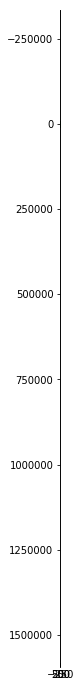

In [6]:
imgL = imread('v0.png')
imgR = imread('u0.png')
plt.figure(figsize=(12,12))
plt.imshow(imgL+imgR)
x = np.arange(0,384,1)
for ip in range(0,len(df)):
    plx = df['xL'].iloc[ip]
    ply = df['cL'].iloc[ip]
    prx = df['xR'].iloc[ip]
    pry = df['cR'].iloc[ip]
    ipL = [plx,ply,1]
    ipR = [prx,pry,1]
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])  
    plt.plot(x,yL,color='g')
    plt.plot(x,yR,color='r')
    plt.plot(prx,pry,"o",color='r')    
    plt.plot(plx,ply,"o",color='g')  
    print(ip,dlr,drl)
plt.show()